## <b> Mobile Price Range Prediction </b>

______________________________

### <b> Importing Libraries </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
sns.set_palette('Set2')
sns.set_style("whitegrid")
pd.set_option('display.max_columns', 21)

In [2]:
train_data = pd.read_csv("E:/Extra Codes/Data Sciene/Datasets/Mobile Price Prediction/train_data.csv")
test_data = pd.read_csv("E:/Extra Codes/Data Sciene/Datasets/Mobile Price Prediction/test_data.csv")

In [3]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
print(f'Train Shape: - {train_data.shape}')
print(f'Test Shape: - {test_data.shape}')

Train Shape: - (2000, 21)
Test Shape: - (1000, 21)


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### <b> Checking for Null values </b>

In [7]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

#### Target variable is a Price_Range and not actual price of the mobile

### <b> EDA </b>

<Axes: >

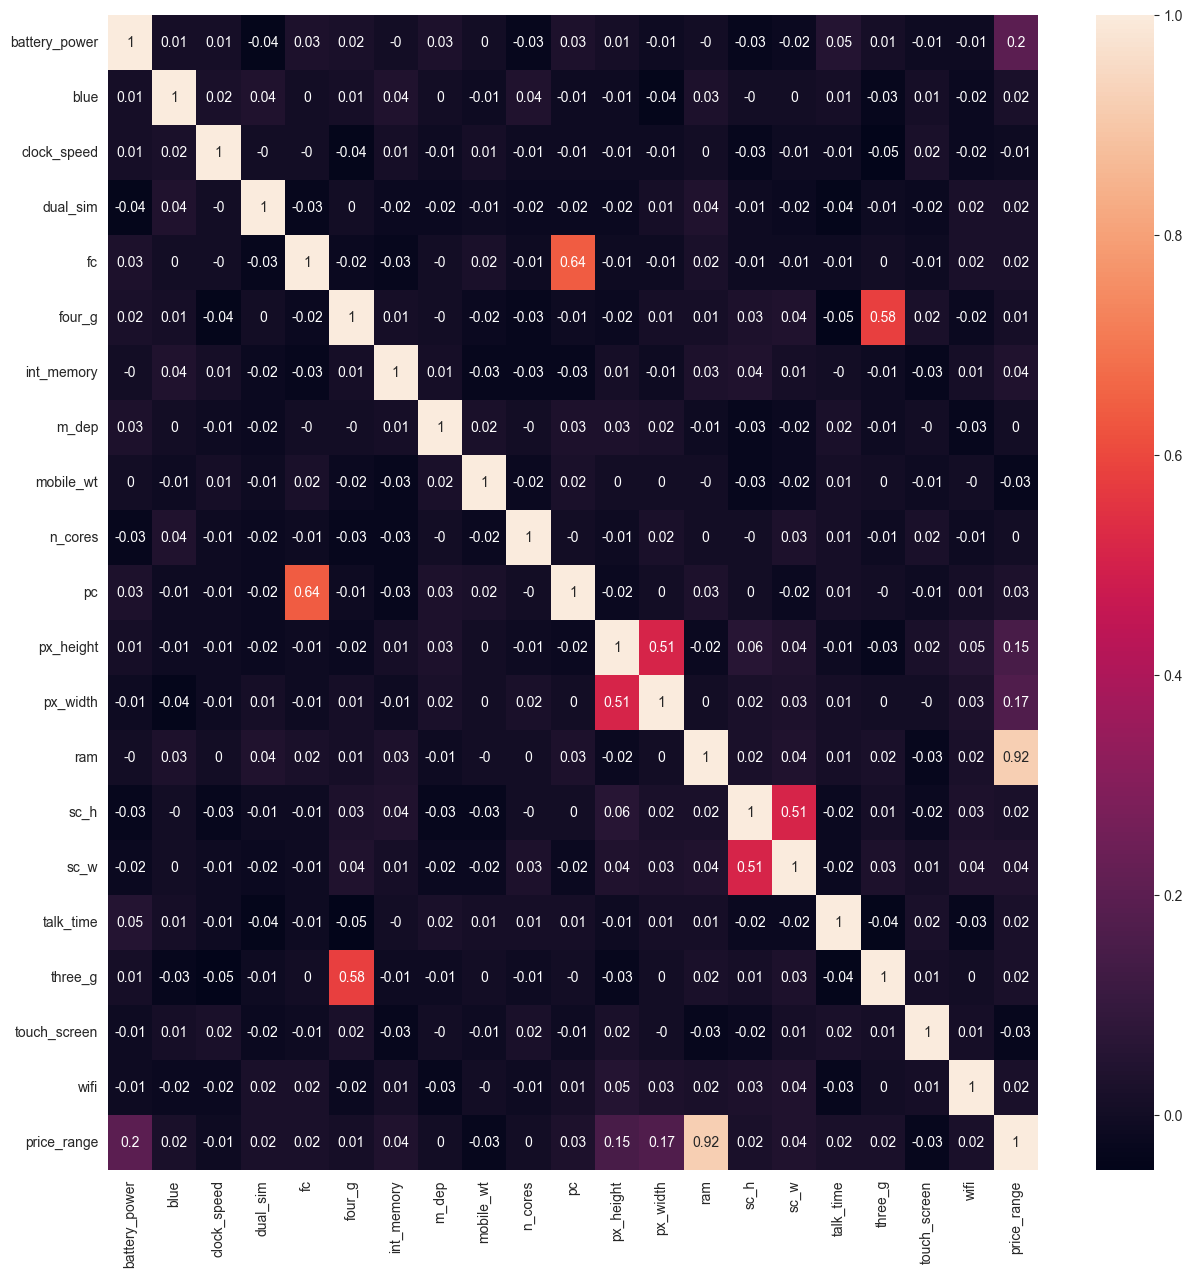

In [9]:
fig, ax = plt.subplots(1,1, figsize = (15,15))
sns.heatmap(np.round(train_data.corr(), 2), annot=True, ax = ax)

<font size = 6>Observation: - </font><br><br><b>Price_Range is most related with this columns </b><br><br>
                                            1) Ram<br>
                                            2) px_width<br>
                                            3) px_height<br>
                                            4) battery_power<br>
___________________________________________________________________________________________________________________

[Text(0, 0, '500'), Text(0, 0, '500'), Text(0, 0, '500'), Text(0, 0, '500')]

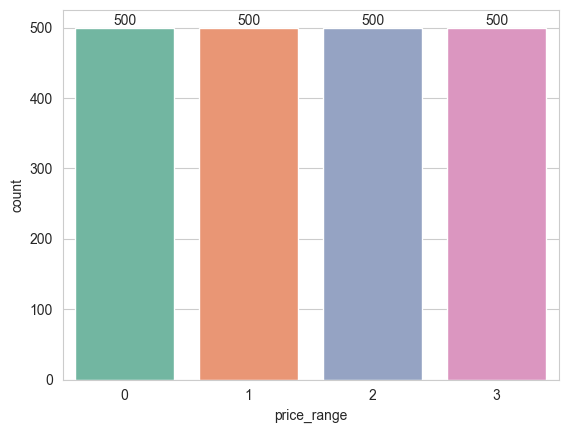

In [10]:
ax = sns.countplot(x = train_data['price_range'])
ax.bar_label(ax.containers[0])

<font size = 6>Observation: - </font><br><br>We have 500 data for each of the price ranges
__________________________________________________________________________________________

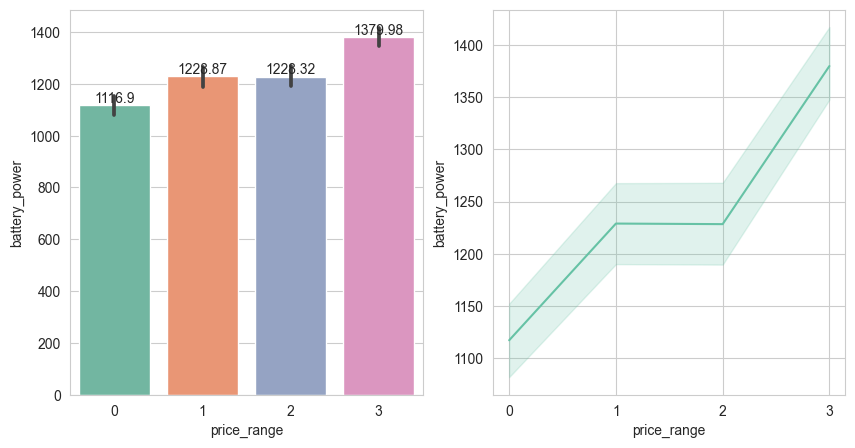

In [13]:
fig, ax  = plt.subplots(1, 2, figsize = (10,5))
sns.barplot(x = train_data['price_range'], y = train_data['battery_power'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

sns.lineplot(x = train_data['price_range'], y = train_data['battery_power'], ax = ax[1])
ax[1].set_xticks([0, 1, 2, 3])

<font size = 6>Observation: - </font><br><br>More the battery life of the phone more will be the price range<br>
Price_range between 1 and 2 have majorly same battery_powers
_______________________________________________________________________________________________

<Axes: xlabel='blue', ylabel='price_range'>

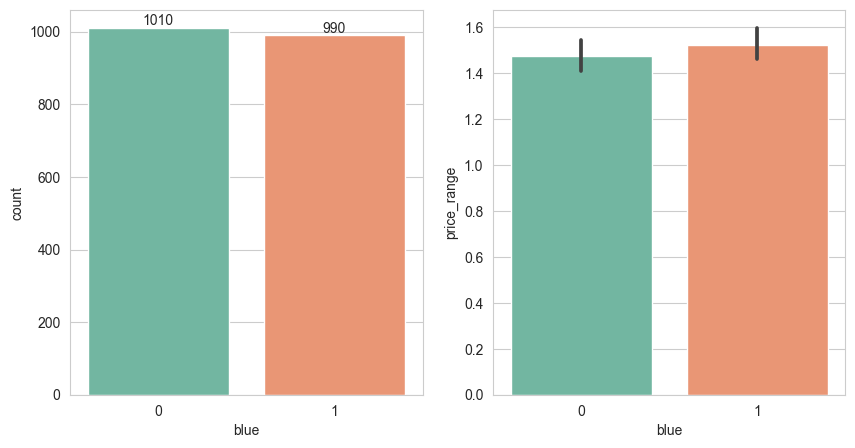

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.countplot(x = train_data['blue'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

sns.barplot(x = train_data['blue'], y = train_data['price_range'])

<font size = 6>Observation: - </font><br><br>More than half of the mobiles dont have bluetooth<br>
The ones with bluetooth have little higher price range than the other ones
______________________________________________________________________________________________________

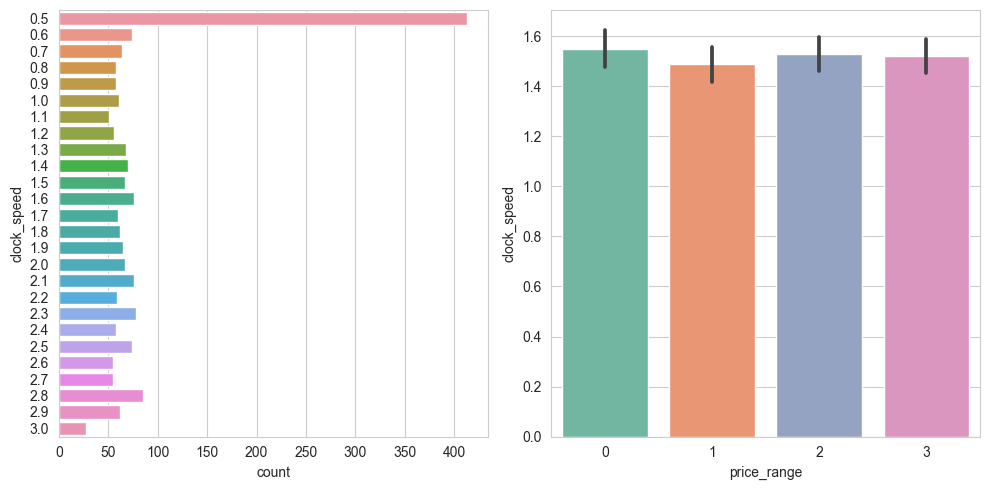

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(y = train_data['clock_speed'], ax = ax[0])

sns.barplot(x = train_data['price_range'], y = train_data['clock_speed'], ax = ax[1])
ax[1].set_xticks([0,1,2,3])
plt.tight_layout()

<font size = 6>Observation: - </font><br><br>Most of the phones have low clock speed and are slow<br>
According to data price dont affect on basis of clock speed they are somewhat same
____________________________________________________________________________________

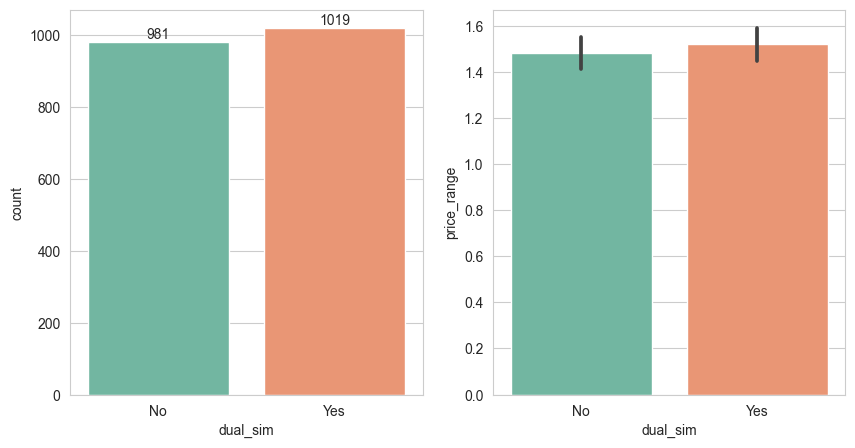

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(x = train_data['dual_sim'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_xticks([0,1], ['No', 'Yes'])

sns.barplot(x = train_data['dual_sim'], y = train_data['price_range'], ax = ax[1])
ax[1].set_xticks([0,1], ['No', 'Yes'])

<font size = 6>Observation: - </font><br><br>Half of the phones dont have dual sim<br>
According to data price dont affect whether phone has a dual sim or not but there is a slight high price for dual sim phones
________________________________

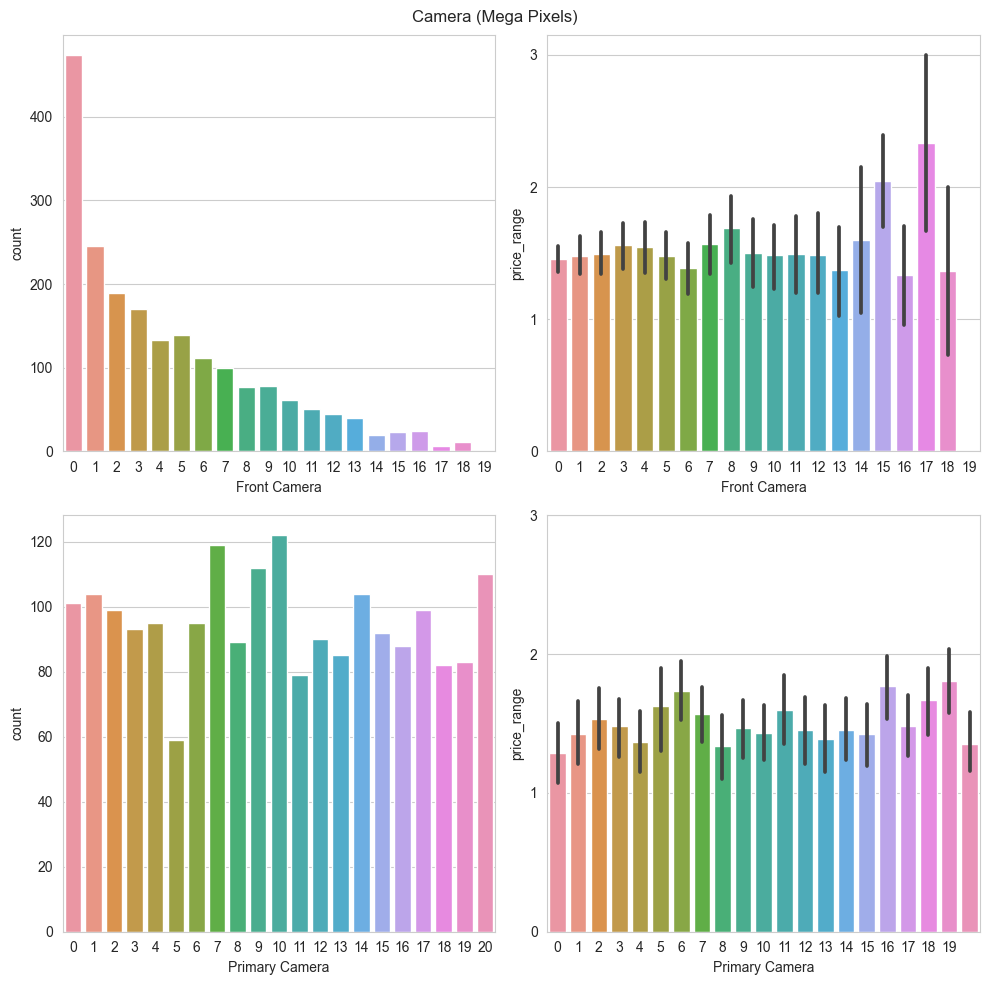

In [17]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

sns.countplot(x = train_data['fc'], ax = ax[0][0])
ax[0][0].set_xlabel("Front Camera")

sns.barplot(x = train_data['fc'], y = train_data['price_range'],ax = ax[0][1])
ax[0][1].set_xticks(np.arange(0, 20))
ax[0][1].set_yticks([0, 1, 2, 3])
ax[0][1].set_xlabel("Front Camera")

sns.countplot(x = train_data['pc'], ax = ax[1][0])
ax[1][0].set_xlabel("Primary Camera")

sns.barplot(x = train_data['pc'], y = train_data['price_range'],ax = ax[1][1])
ax[1][1].set_xticks(np.arange(0, 20))
ax[1][1].set_yticks([0, 1, 2, 3])
ax[1][1].set_xlabel("Primary Camera")

fig.suptitle("Camera (Mega Pixels)")
plt.tight_layout()

<font size = 6>Observation: - </font><br>
1) Around 400+ mobiles don't have front camera and there are very few mobiles with high pixel front cameras
2) Around 100 mobiles dont't have primary camera and the highest primary camera pixel is 20
3) According to data Price range is not affected by the camera pixels.
________________________________

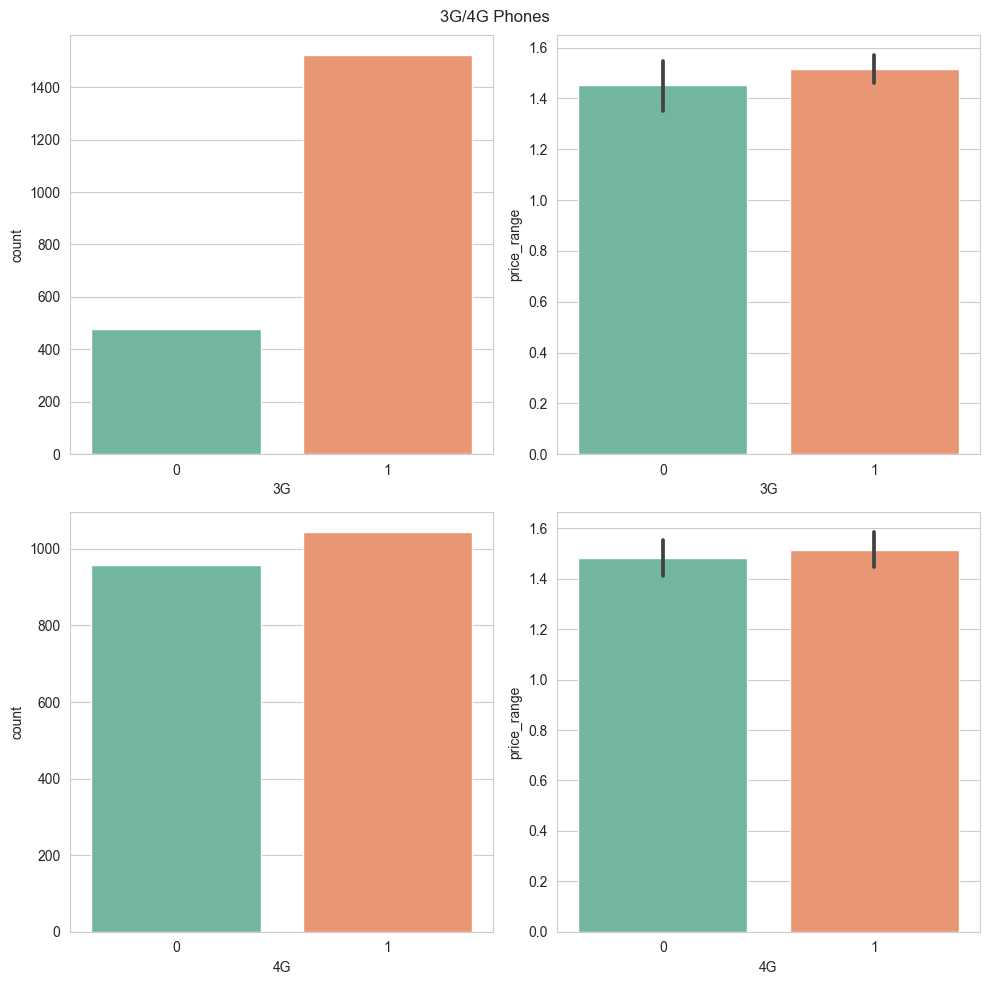

In [18]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

sns.countplot(x = train_data['three_g'], ax = ax[0][0])
ax[0][0].set_xlabel("3G")

sns.barplot(x = train_data['three_g'], y = train_data['price_range'],ax = ax[0][1])
ax[0][1].set_xlabel("3G")

sns.countplot(x = train_data['four_g'], ax = ax[1][0])
ax[1][0].set_xlabel("4G")

sns.barplot(x = train_data['four_g'], y = train_data['price_range'],ax = ax[1][1])
ax[1][1].set_xlabel("4G")

fig.suptitle("3G/4G Phones")
plt.tight_layout()

<font size = 6>Observation: - </font><br>
1) More than Half of the phones have 3G facality and have a slight high price than the ones which do not have it
2) Half of the phones don't have 4G facality same as 3G slight change in price
________________________________

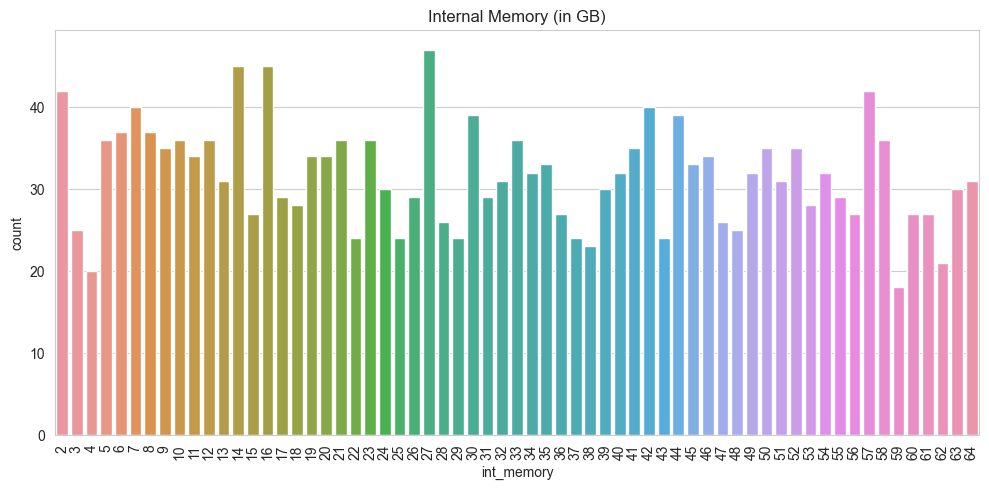

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x = train_data['int_memory'])
plt.xticks(rotation = 90)
plt.title("Internal Memory (in GB)")
plt.tight_layout()

<font size = 6>Observation: - </font><br>
1) 120+ Phones have 27GB, 14GB, 16GB of  int memory
2) Around 100 phones only have less then 5GB of int memory
3) Highest int memory is with 64GB of around 30+ phones
________________________________

Text(0.5, 1.0, 'Mobile Depth (in cm)')

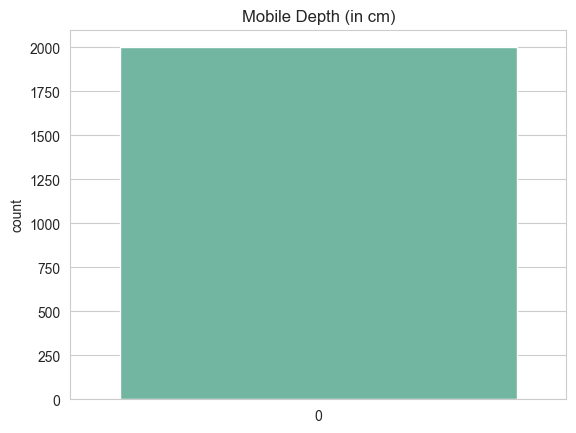

In [20]:
sns.countplot(train_data['m_dep'])
plt.title("Mobile Depth (in cm)")

<font size = 6>Observation: - </font><br>
1) 300+ mobiles have 1mm of Depth
2) 100+ mobiles have 10mm of Depth
3) 400+ mobiles have depth between 2mm-9mm
________________________________

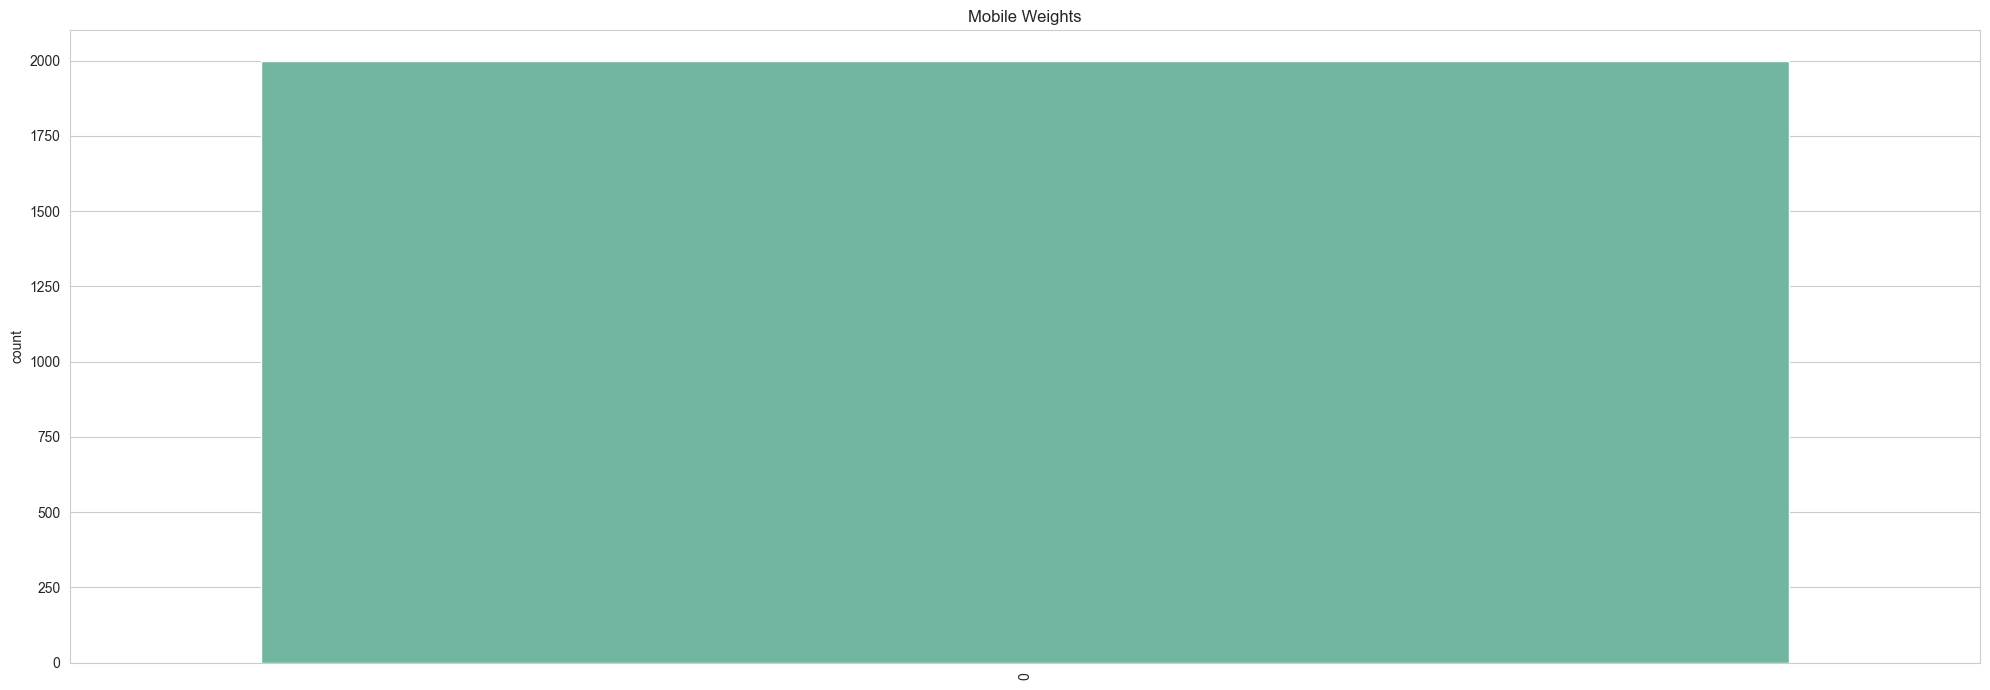

In [21]:
plt.figure(figsize=(20,7))
sns.countplot(train_data['mobile_wt'])
plt.xticks(rotation = 90)
plt.title("Mobile Weights")
plt.tight_layout()

<font size = 6>Observation: - </font><br>
1) Mobile weights are between 80g-200g
2) Average weight of mobile phones is 140g
________________________________

<Axes: ylabel='count'>

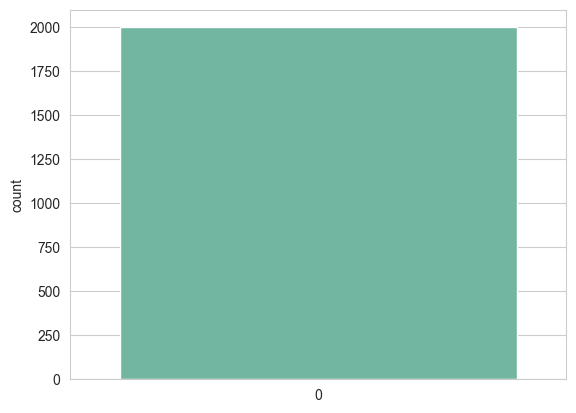

In [22]:
sns.countplot(train_data['n_cores'])

<font size = 6>Observation: - </font><br>
1) We have Mobile phones cores ranging between 1-8
2) Mobiles with 4 core is slight high around 250+
________________________________

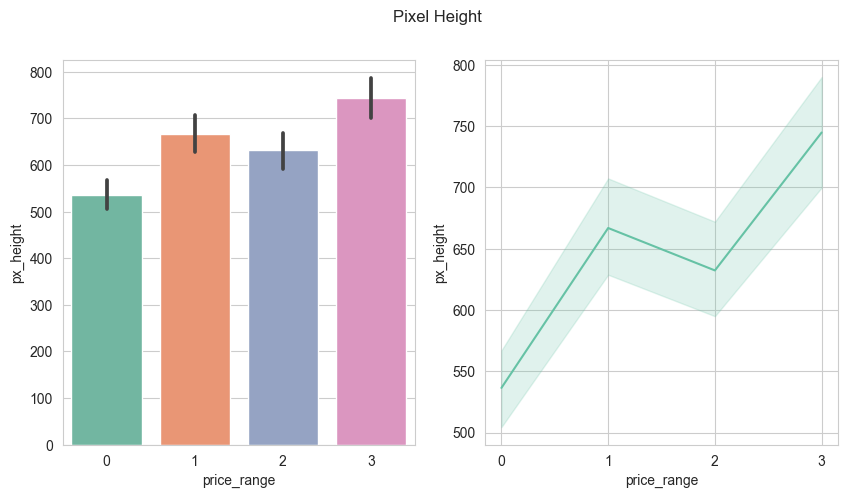

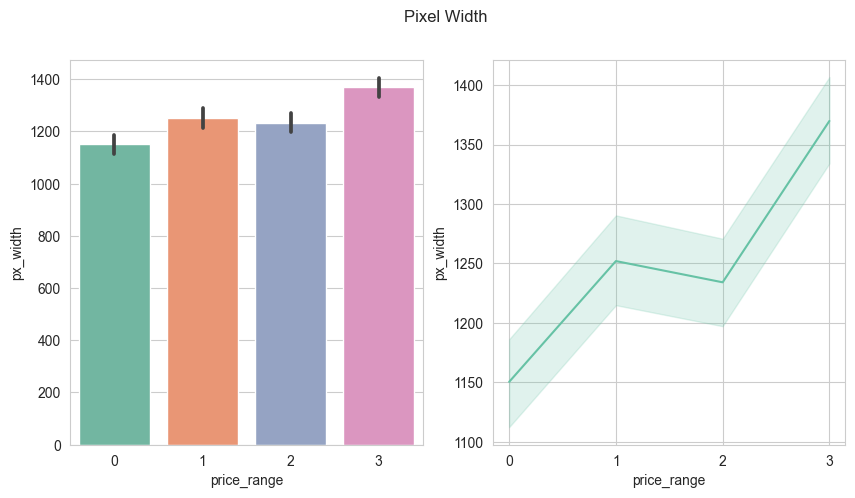

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

fig.suptitle("Pixel Height")

sns.barplot(x = train_data['price_range'], y = train_data['px_height'], ax = ax[0])

sns.lineplot(x = train_data['price_range'], y = train_data['px_height'], ax = ax[1])
ax[1].set_xticks([0,1,2,3])

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

fig.suptitle("Pixel Width")

sns.barplot(x = train_data['price_range'], y = train_data['px_width'], ax = ax[0])

sns.lineplot(x = train_data['price_range'], y = train_data['px_width'], ax = ax[1])
ax[1].set_xticks([0,1,2,3])
ax[1].set_xticks([0,1,2,3])

<font size = 6>Observation: - </font><br>
1) With increase of pixel Height and width the price also increases
2) At price range of 1 and 2, The price range of 2 has low pixel width and height then the price range of 1
________________________________

#### Also there are 2 columns with 0 pixel height

In [11]:
# So looking into the data there were other columns with same width so replacing them with there particular heights

train_data[(train_data['px_width'] == 1987) | (train_data['px_width'] == 994)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
324,1698,0,2.1,0,5,1,18,0.9,160,6,20,363,994,796,13,3,14,1,0,1,0
588,1966,1,1.4,1,2,0,40,0.9,185,8,18,1197,1987,1185,11,2,20,0,1,0,2
1481,1834,0,2.1,0,7,1,40,0.1,99,4,11,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,10,0,994,1958,7,5,7,1,1,0,1


In [12]:
#Replacing this values accordingly
train_data.loc[1481, 'px_height'] = 1197
train_data.loc[1933, 'px_height'] = 363

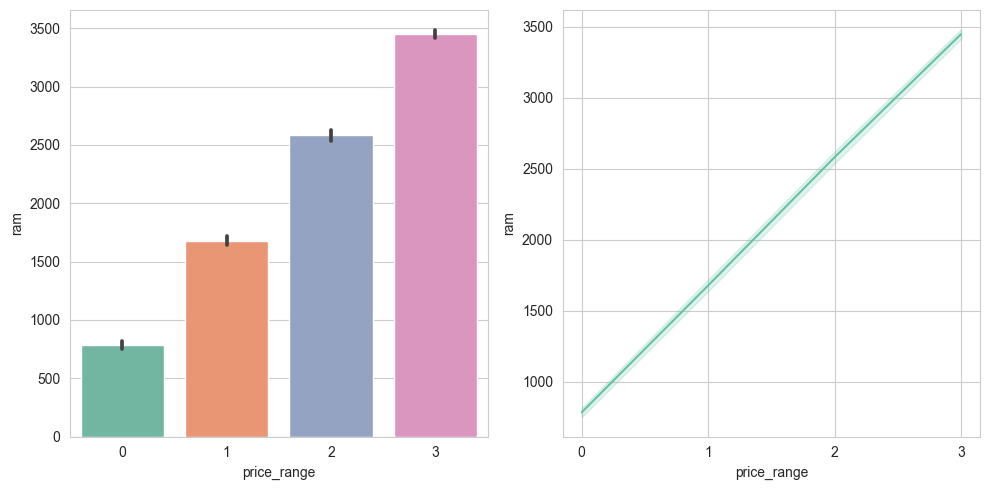

In [152]:
fig, ax  = plt.subplots(1, 2, figsize = (10,5))

sns.barplot(x = train_data['price_range'], y = train_data['ram'], ax = ax[0])

sns.lineplot(x = train_data['price_range'], y = train_data['ram'], ax = ax[1])
ax[1].set_xticks([0, 1, 2, 3])

plt.tight_layout()

<font size = 6>Observation: - </font><br>
1) As the Ram increases the Price also increases
2) The highest ram size is 4GB or near not more than that in the data
________________________________

Text(0, 0.5, '')

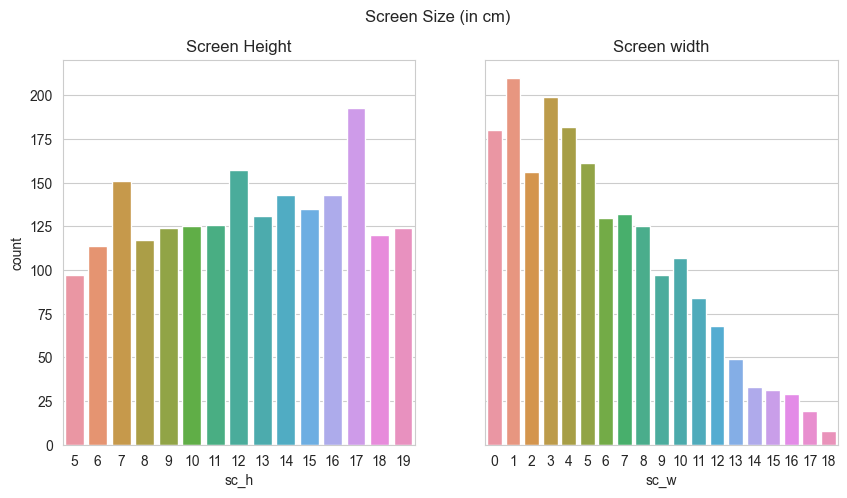

In [153]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5), sharey=True)

fig.suptitle("Screen Size (in cm)")

sns.countplot(train_data['sc_h'], ax = ax[0])
ax[0].set_title("Screen Height")

sns.countplot(train_data['sc_w'], ax = ax[1])
ax[1].set_title("Screen width")
ax[1].set_ylabel("")

<font size = 6>Observation: - </font><br>
1) Screen height ranges between 5cm-19cm
2) About 175+ mobile phones have screen height of 17
3) Screen width ranges between 0cm-18cm (But width cannot be zero so this are the wrong data so we need to remove this)
4) Also screen width of 1cm-3cm are also quite small but we will keep those data
________________________________

In [13]:
#Removing the rows which have 0 screen width
train_data = train_data[~(train_data['sc_w'] == 0)]

#Also for the testing dataset
test_data = test_data[~((test_data['sc_w'] == 0) | (test_data['px_height'] == 0))]

<AxesSubplot:xlabel='talk_time', ylabel='count'>

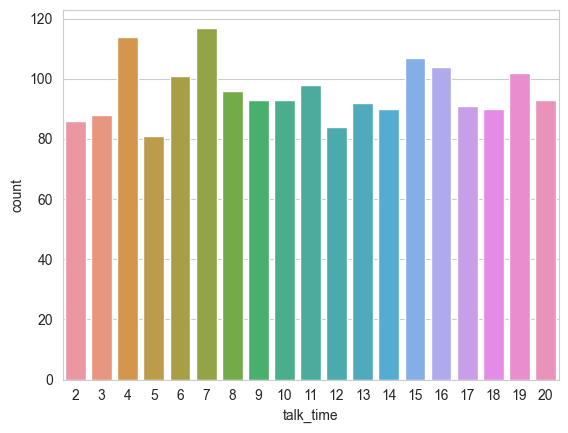

In [155]:
sns.countplot(train_data['talk_time'])

<font size = 6>Observation: - </font><br>
1) Talk-time ranges between 2hrs-20hrs
2) about 200+ phones have talk-time of 4-7 hrs
________________________________

Text(0.5, 0.98, 'Touch Screen facility')

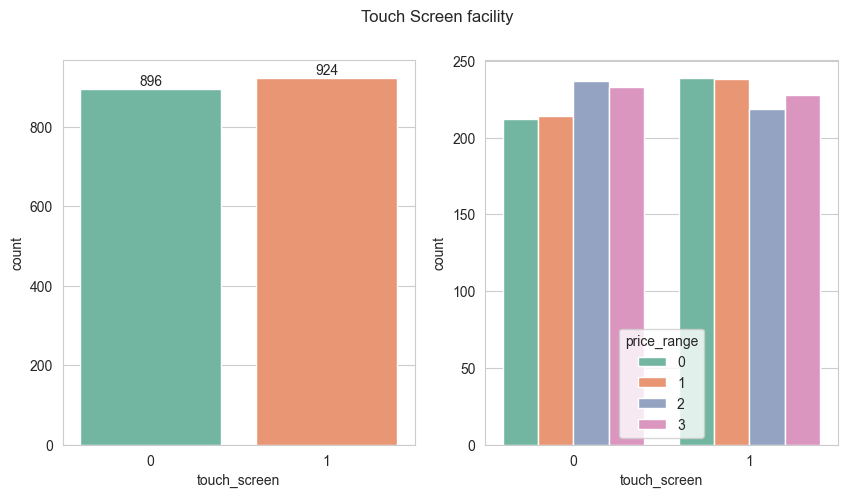

In [156]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.countplot(x = train_data['touch_screen'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

sns.countplot(x = train_data['touch_screen'], hue = train_data['price_range'])

fig.suptitle("Touch Screen facility")

<font size = 6>Observation: - </font><br>
1) More than half of the phones dont have touch screen facality
2) The ones with not having touch screen facality have high number of phones between price_range of 2-3
3) And ones having touch screen facality have low number of phones between price_range between 2-3
________________________________

Text(0.5, 0.98, 'WIFI facility')

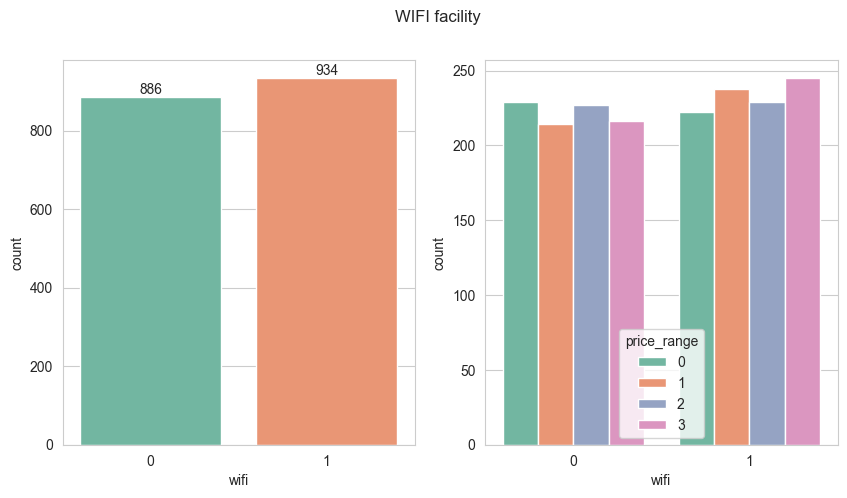

In [157]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.countplot(x = train_data['wifi'], ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

sns.countplot(x = train_data['wifi'], hue = train_data['price_range'])

fig.suptitle("WIFI facility")

<font size = 6>Observation: - </font><br>
1) More than half of the phones dont have wifi facility
2) Price ranges are same for the phones not having wifi facility
3) Price ranges are slightly increasing with wifi facility
________________________________

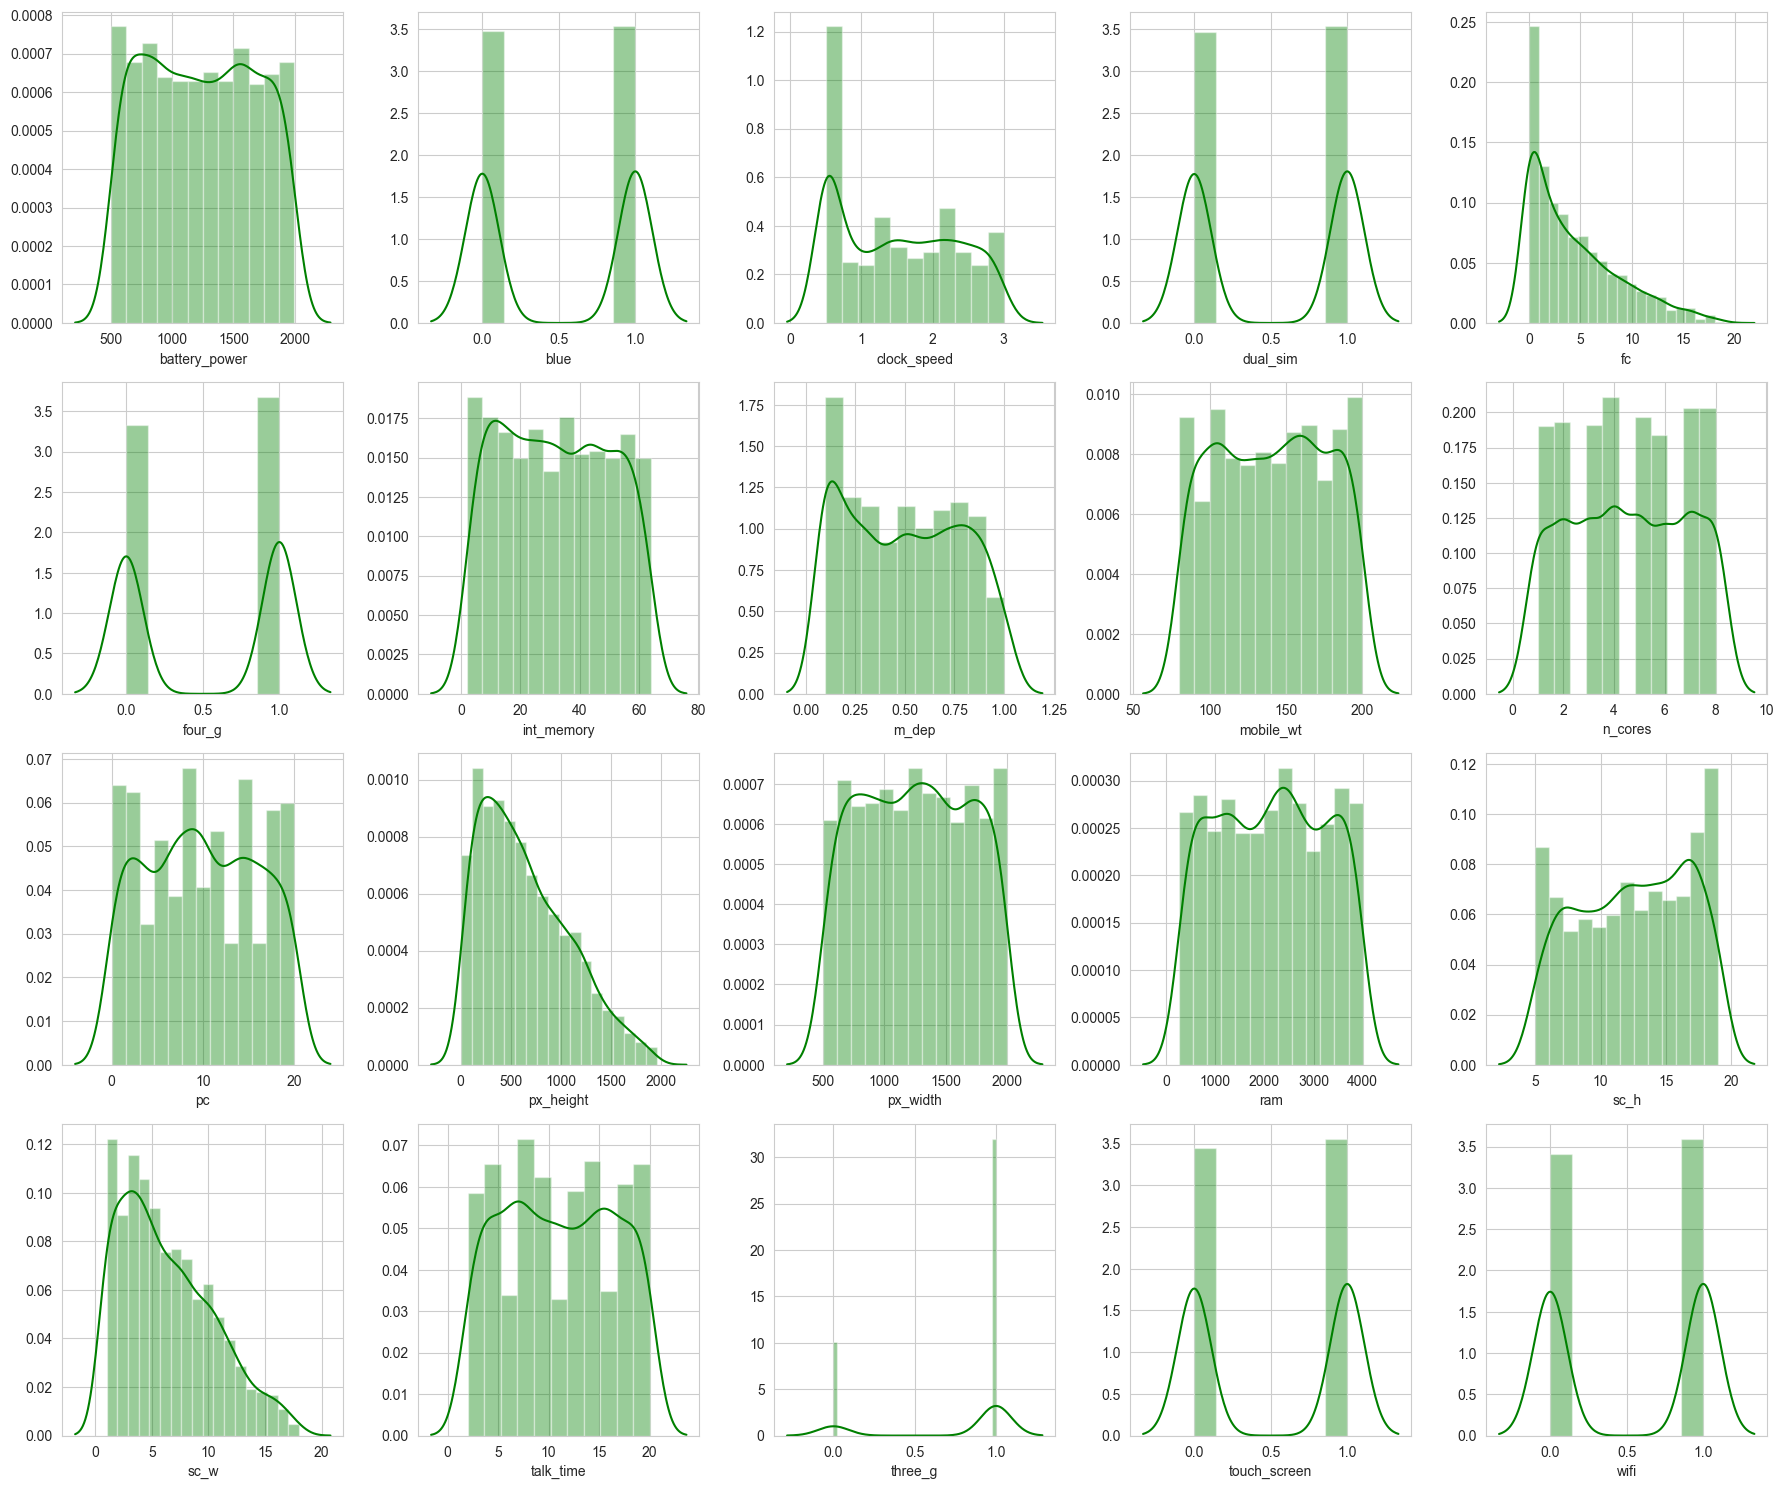

In [158]:
fig, ax = plt.subplots(4, 5, figsize = (18, 15))
count = 0
for i in range(4):
    for j in range(5):
        sns.distplot(train_data[train_data.columns[count]], ax = ax[i][j], color='green')
        ax[i][j].set_ylabel("")
        count += 1
plt.tight_layout()

<font size = 6>Observation: - </font><br>
1) Most of them are skewed and others are discrete so skipping them
2) Sum of them look like log normal distribution  like (fc, sc_w) but the data seems tree so not converting them to gaussian distribution
________________________________

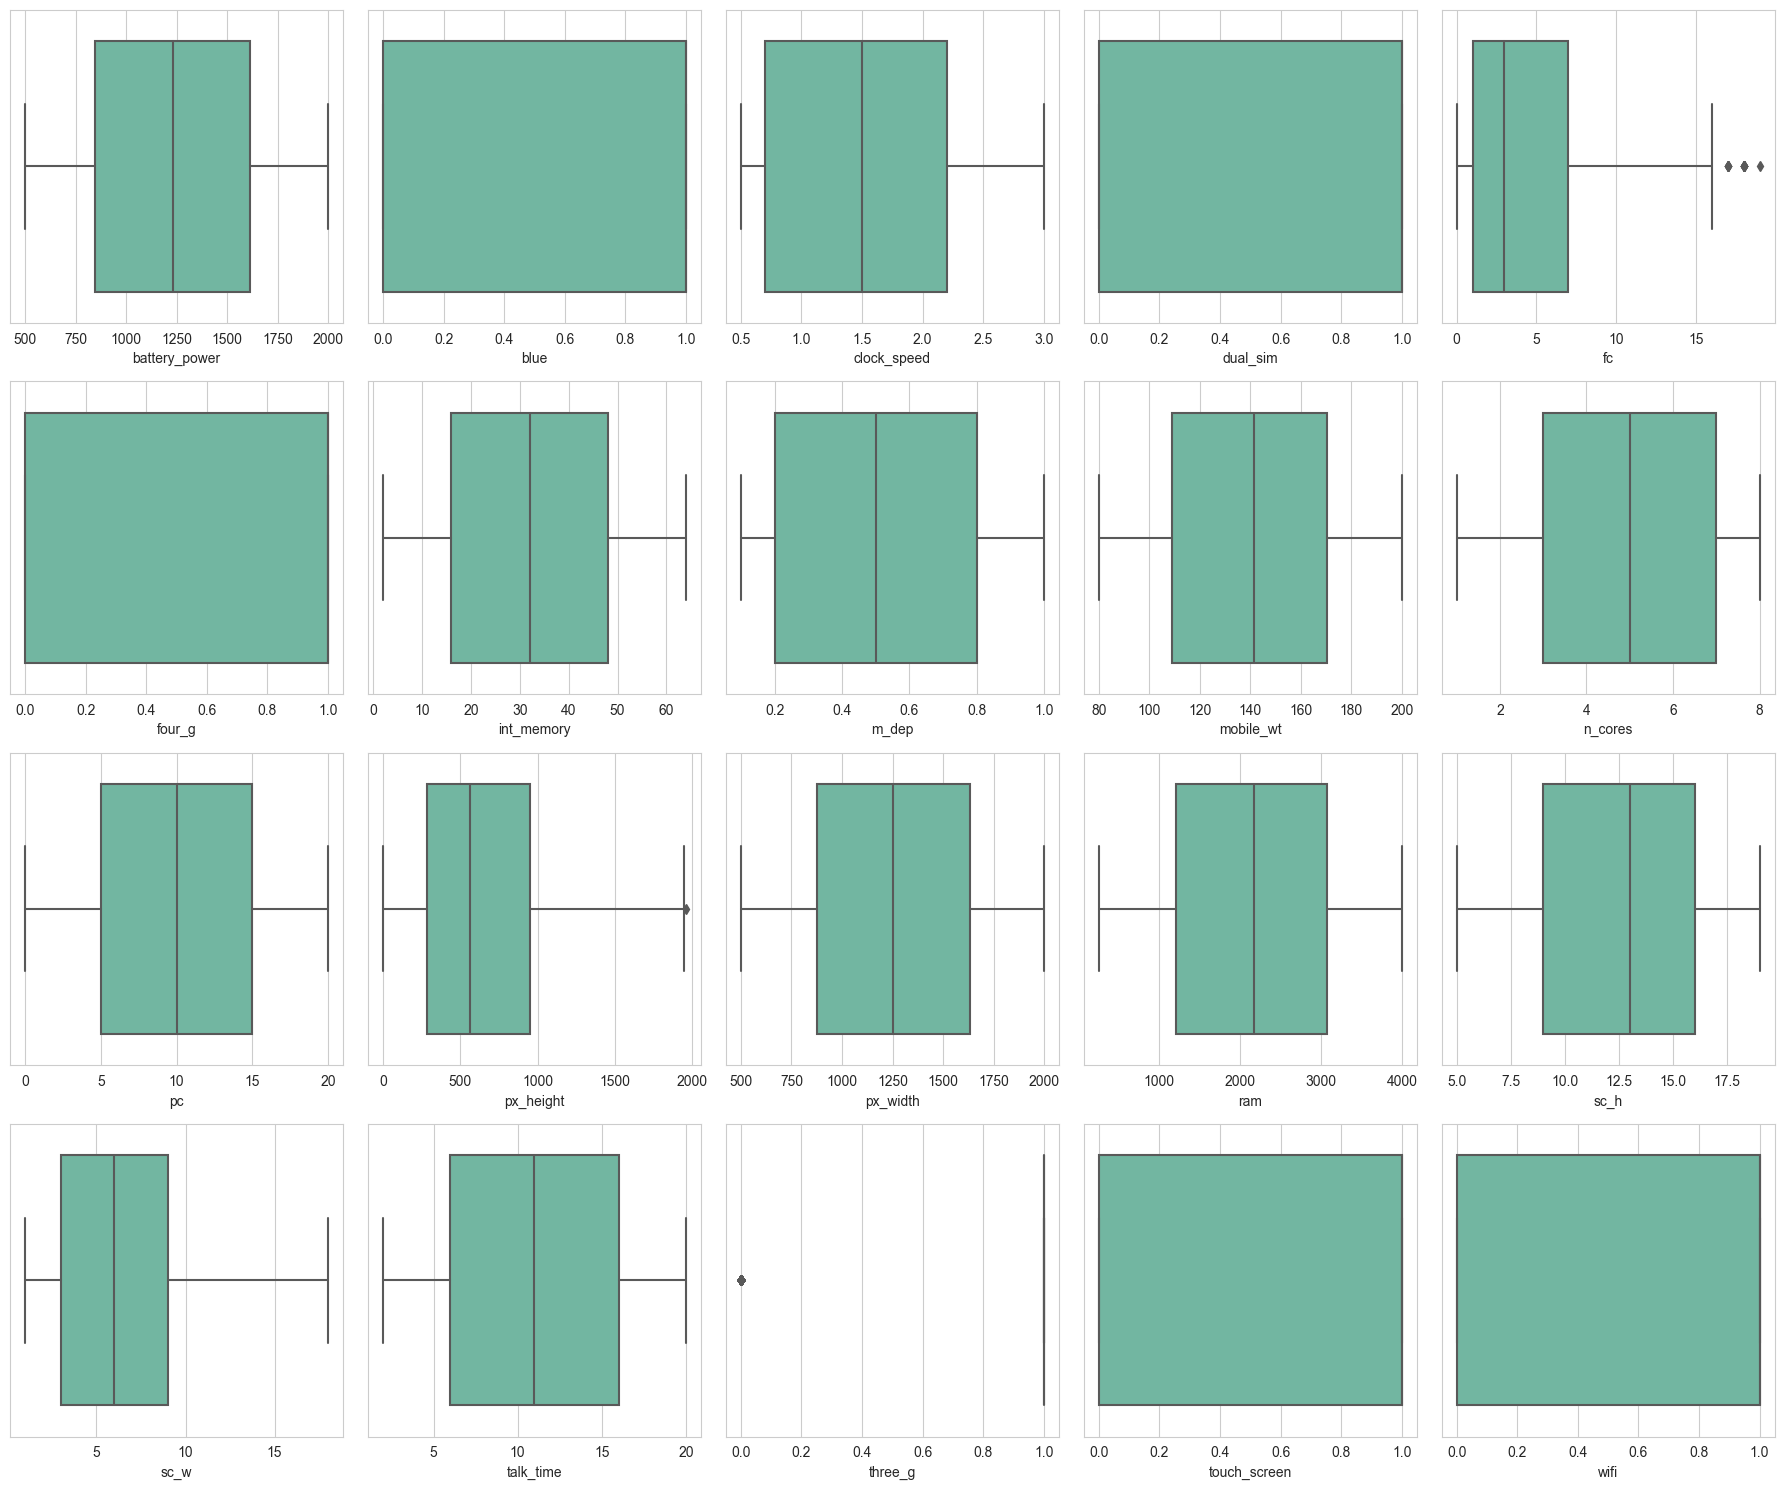

In [159]:
fig, ax = plt.subplots(4, 5, figsize = (18, 15))
count = 0
for i in range(4):
    for j in range(5):
        sns.boxplot(train_data[train_data.columns[count]], ax = ax[i][j])
        ax[i][j].set_ylabel("")
        count += 1
plt.tight_layout()

<font size = 6>Observation: - </font><br>
1) Most of them not have outliers
2) Others like (px_height, fc) seems to have outliers but keeping them to not overfit the data
________________________________

### <b> Feature Scaling </b>

In [14]:
#Applying minmaxscaler on columns with more than 10 discrete values
minmaxscaler = MinMaxScaler()

columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 
           'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

train_data[columns] = minmaxscaler.fit_transform(train_data[columns])

#Same for testing columns
test_data[columns] = minmaxscaler.transform(test_data[columns])


In [75]:
X, y = train_data.drop(columns=['price_range']), train_data['price_range']
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3,random_state=42)

In [16]:
print(f'X_train: - {x_train.shape}\nX_test: - {x_val.shape}')

X_train: - (1274, 20)
X_test: - (546, 20)


### <b> Model Developement</b>

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report,accuracy_score

In [246]:
#Creating Function for measuring metrics of every model

res = {'Model':[], 'Accuracy':[], 'CV Score':[]}

def metrics(train_predicts, test_predicts, model, ensemble = False, name = ''):

    fig, ax = plt.subplots(1,2, figsize = (10,5))
    fig.suptitle(name)

    print("*"*50)
    print(f'Train Accuracy: - {np.round(accuracy_score(train_predicts, y_train), 2)*100}%')
    print(f'Test Accuracy: - {np.round(accuracy_score(test_predicts, y_val), 2)*100}%')

    print(f'\n**********Classification Report**********\n\n')
    print(classification_report(y_val, test_predicts))
    
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'**********Cross Validation**********\n\n')

    print(pd.Series(cv_scores))
    print(f'\n\nMean Score: - {np.mean(cv_scores)}\n')

    matrix = confusion_matrix(test_predicts, y_val)
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", ax = ax[0])
    

    if ensemble == True:
        temp = pd.DataFrame(
        model.feature_importances_,
        index=x_train.columns, columns=['Features']).sort_values('Features', ascending=True)


        ax[1].barh(temp.index, temp['Features'])
    
    res['Model'].append(name)
    res['Accuracy'].append(np.round(accuracy_score(test_predicts, y_val), 2)*100)
    res['CV Score'].append(np.round(np.mean(cv_scores), 2))
    
    plt.tight_layout()

#### Logistic Regression

In [165]:
#Hyperparameter tunning for Logistic Regression
param_grid = {
    'C': [0.1, 1.0, 10.0, 100],  # Regularization parameter
    'penalty': ['l1', 'l2',None],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Solver algorithm
    'max_iter': [100, 200, 300, 400, 500]  # Maximum number of iterations
}

scoring = 'accuracy'

grid_search_logistic = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring=scoring, cv=5, n_jobs=-1)
grid_search_logistic.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10.0, 100],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', None],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [166]:
grid_search_logistic.best_estimator_

LogisticRegression(C=10.0, max_iter=500, penalty='l1', solver='saga')

**************************************************
Train Accuracy: - 99.0%
Test Accuracy: - 97.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       133
           1       0.95      0.97      0.96       144
           2       0.97      0.94      0.95       142
           3       0.96      0.99      0.98       127

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546

**********Cross Validation**********


0    0.978022
1    0.961538
2    0.975275
3    0.972527
4    0.975275
dtype: float64


Mean Score: - 0.9725274725274724



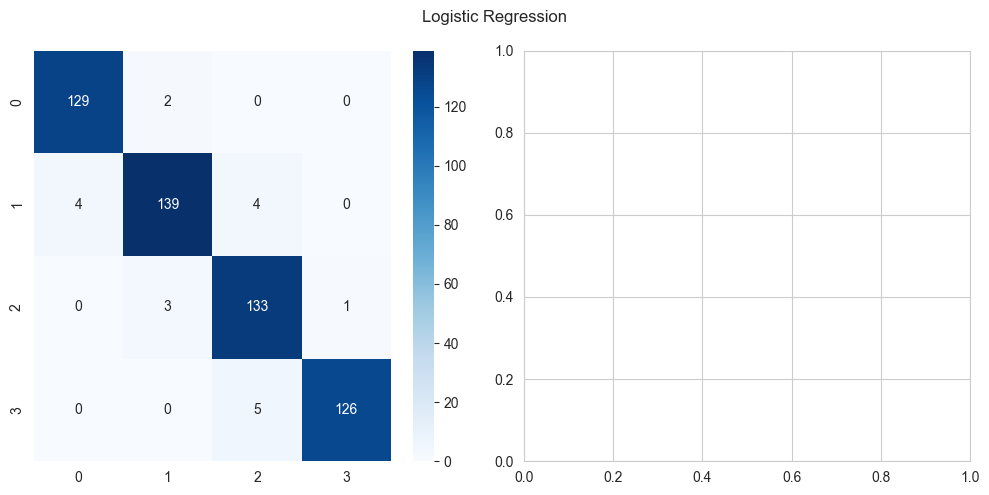

In [167]:
model_logistic = grid_search_logistic.best_estimator_

metrics(model_logistic.predict(x_train), model_logistic.predict(x_val),model=model_logistic, name='Logistic Regression')

#### Decision Tree

In [168]:
max_depth = [5, 10, 50, 100, 150, 200,500, 1000]
min_samples_split = [2,5,10, 12, 14]
min_samples_leaf = [5, 10, 20, 50, 100]

grid_dt_para = {
                'max_depth':max_depth,
                'min_samples_split': min_samples_split,
                'criterion':['gini','entropy',None],
                'min_samples_leaf':min_samples_leaf}

grid_df_CV = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_dt_para, cv=5, scoring='accuracy', n_jobs=-1)

grid_df_CV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', None],
                         'max_depth': [5, 10, 50, 100, 150, 200, 500, 1000],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [2, 5, 10, 12, 14]},
             scoring='accuracy')

In [169]:
grid_df_CV.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       min_samples_split=12)

**************************************************
Train Accuracy: - 92.0%
Test Accuracy: - 83.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.87      0.93      0.90       133
           1       0.84      0.73      0.78       144
           2       0.78      0.76      0.77       142
           3       0.83      0.91      0.87       127

    accuracy                           0.83       546
   macro avg       0.83      0.83      0.83       546
weighted avg       0.83      0.83      0.83       546

**********Cross Validation**********


0    0.857143
1    0.848901
2    0.857143
3    0.832418
4    0.832418
dtype: float64


Mean Score: - 0.8456043956043956



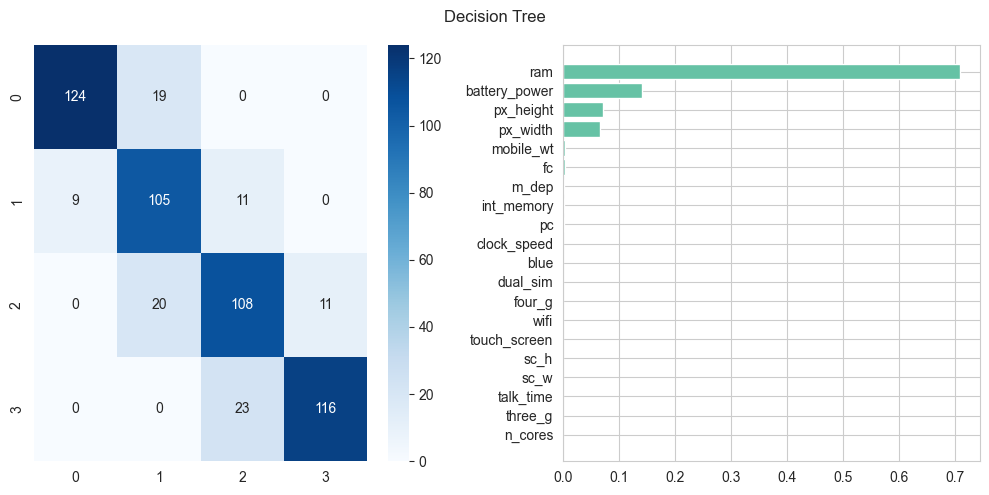

In [170]:
model_dt = grid_df_CV.best_estimator_

metrics(model_dt.predict(x_train), model_dt.predict(x_val), model_dt, ensemble=True, name = 'Decision Tree')

#### Random Forest

In [171]:
n_estimators = [5, 10, 50,100]
max_depth = [10, 25, 50, 100, 120,500]
min_samples_split = [2,5,10, 15]
min_samples_leaf = [1,2,4,6]

grid_rf_para = {
                'max_depth':max_depth,
                'min_samples_split': min_samples_split,
                'criterion':['gini','entropy',None],
                'min_samples_leaf':min_samples_leaf,
                'n_estimators':n_estimators}

grid_rf_CV = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf_para, cv=5, n_jobs=-1)

grid_rf_CV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', None],
                         'max_depth': [10, 25, 50, 100, 120, 500],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [5, 10, 50, 100]})

In [172]:
grid_rf_CV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=500, min_samples_leaf=2,
                       min_samples_split=5)

**************************************************
Train Accuracy: - 100.0%
Test Accuracy: - 87.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.92      0.98      0.95       133
           1       0.90      0.81      0.85       144
           2       0.81      0.80      0.80       142
           3       0.87      0.92      0.89       127

    accuracy                           0.87       546
   macro avg       0.87      0.88      0.87       546
weighted avg       0.87      0.87      0.87       546

**********Cross Validation**********


0    0.881868
1    0.887363
2    0.884615
3    0.865385
4    0.873626
dtype: float64


Mean Score: - 0.8785714285714284



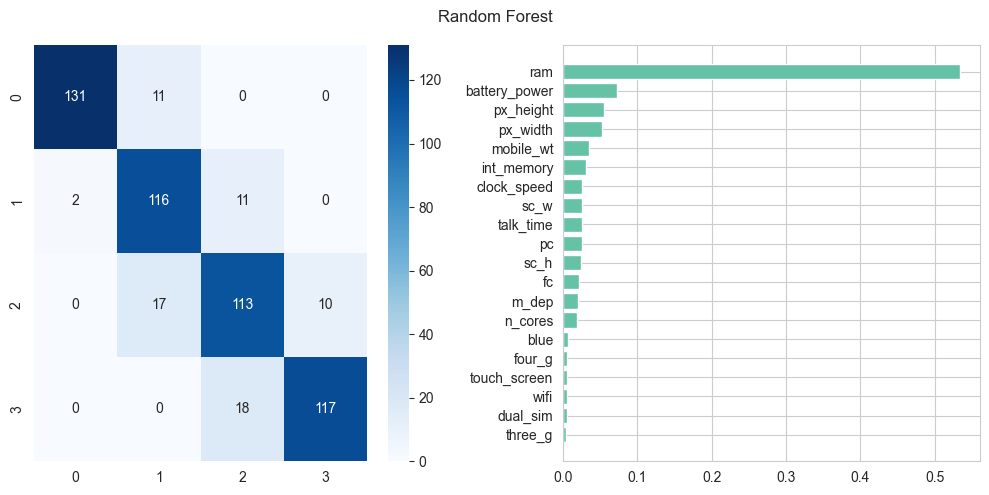

In [173]:
model_rf = grid_rf_CV.best_estimator_

metrics(model_rf.predict(x_train), model_rf.predict(x_val), model= model_rf, name='Random Forest', ensemble=True)

#### XGBOOST

In [174]:
xgb_model = XGBClassifier(objective='binary:logistic')

param_grid_xgb = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}

grid_xg_cv = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy')

grid_xg_cv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

**************************************************
Train Accuracy: - 100.0%
Test Accuracy: - 90.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.96      0.97      0.97       133
           1       0.93      0.88      0.90       144
           2       0.83      0.87      0.85       142
           3       0.90      0.91      0.90       127

    accuracy                           0.90       546
   macro avg       0.90      0.90      0.90       546
weighted avg       0.90      0.90      0.90       546

**********Cross Validation**********


0    0.903846
1    0.931319
2    0.928571
3    0.903846
4    0.892857
dtype: float64


Mean Score: - 0.9120879120879121



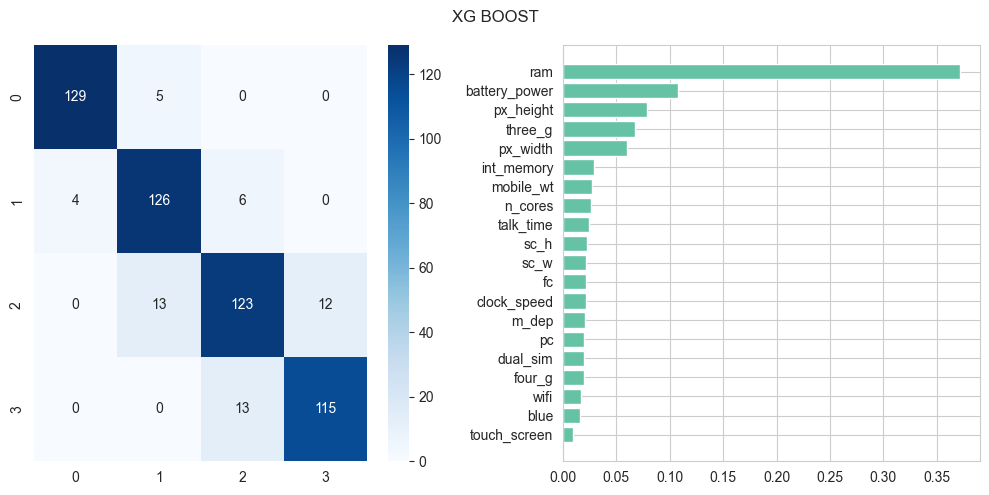

In [175]:
model_xgb = grid_xg_cv.best_estimator_
metrics(model_xgb.predict(x_train), model_xgb.predict(x_val), model = model_xgb, name='XG BOOST', ensemble=True)

#### SVC

In [176]:
param_grid_svm = {'C':[1, 10, 25, 50, 100],
                  'kernel':['linear', 'poly', 'rbf', 'sigmoid'],}

grid_svm_CV = GridSearchCV(estimator=SVC(probability=True), param_grid=param_grid_svm, n_jobs=-1, scoring='accuracy', cv=5)
grid_svm_CV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10, 25, 50, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

**************************************************
Train Accuracy: - 98.0%
Test Accuracy: - 97.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       133
           1       0.96      0.97      0.96       144
           2       0.96      0.94      0.95       142
           3       0.95      0.98      0.97       127

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546

**********Cross Validation**********


0    0.961538
1    0.964286
2    0.972527
3    0.969780
4    0.967033
dtype: float64


Mean Score: - 0.9670329670329669



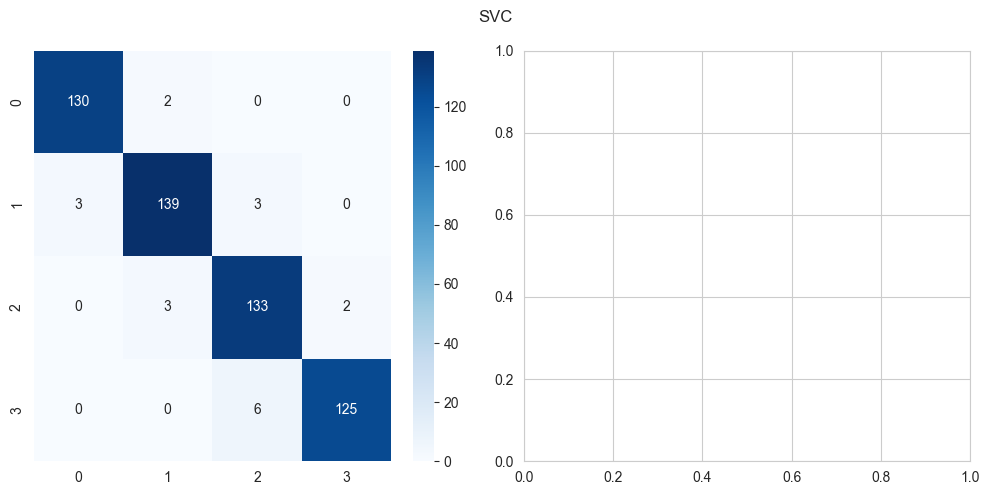

In [177]:
model_svc = grid_svm_CV.best_estimator_

metrics(model_svc.predict(x_train), model_svc.predict(x_val), model = model_svc, name = 'SVC')

#### Naive Bayes

**************************************************
Train Accuracy: - 81.0%
Test Accuracy: - 79.0%

**********Classification Report**********


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       133
           1       0.75      0.67      0.71       144
           2       0.66      0.70      0.68       142
           3       0.84      0.89      0.87       127

    accuracy                           0.79       546
   macro avg       0.79      0.79      0.79       546
weighted avg       0.79      0.79      0.79       546

**********Cross Validation**********


0    0.788462
1    0.818681
2    0.813187
3    0.780220
4    0.785714
dtype: float64


Mean Score: - 0.7972527472527473



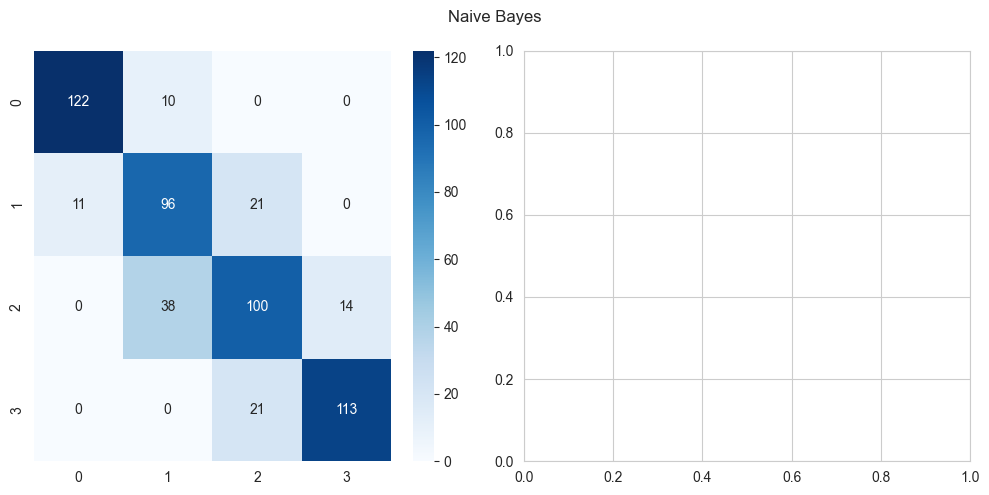

In [178]:
model_nb = GaussianNB().fit(x_train, y_train)

metrics(model_nb.predict(x_train), model_nb.predict(x_val), model=model_nb, name = 'Naive Bayes')

### Comparing Models Accuracy

In [179]:
compare_model = pd.DataFrame(res)

compare_model.set_index('Model', inplace=True)

compare_model

,Accuracy,CV Score
Model,,
Logistic Regression,97.0,0.97
Decision Tree,83.0,0.85
Random Forest,87.0,0.88
XG BOOST,90.0,0.91
SVC,97.0,0.97
Naive Bayes,79.0,0.80


#### <b> Best accuracy is given by both Logistic and SVC Model of abouot 97% Accuracy and Cross validation score </b>

##### Fitting all the training data on the models and predicting the test data Price Range

In [187]:
model_logistic.fit(X, y)
model_dt.fit(X, y)
model_rf.fit(X, y)
model_xgb.fit(X, y)
model_svc.fit(X, y)
model_nb.fit(X, y)

GaussianNB()

In [181]:
id = test_data['id']
test_data.drop(columns=['id'], inplace=True)

In [191]:
final = pd.DataFrame({'ID':id, 
                      'Price_Range_Logistic':model_logistic.predict(test_data),
                      'Price_Range_DT':model_dt.predict(test_data),
                      'Price_Range_RF':model_rf.predict(test_data),
                      'Price_Range_SVC':model_svc.predict(test_data),
                      'Price_Range_NVB':model_nb.predict(test_data),
                      'Price_Range_XGB':model_xgb.predict(test_data)})
final.set_index('ID', inplace=True)

In [192]:
final.head()

,Price_Range_Logistic,Price_Range_DT,Price_Range_RF,Price_Range_SVC,Price_Range_NVB,Price_Range_XGB
ID,,,,,,
1,3,3,3,3,3,3
3,2,3,2,2,2,3
5,1,1,1,1,1,1
6,3,3,3,3,3,3
7,3,3,3,3,3,3


In [42]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [80]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [233]:
model = Sequential()

model.add(Dense(64, input_dim = 20, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.01)))
model.add(Dense(64, input_dim = 20, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.01)))
model.add(Dense(4, activation = 'softmax'))

In [234]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 64)                1344      
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 dense_47 (Dense)            (None, 4)                 260       
                                                                 
Total params: 5764 (22.52 KB)
Trainable params: 5764 (22.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [235]:
model.compile(loss = 'categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(0.01))

In [236]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), verbose=1)

Epoch 1/100


40/40 [==============================] - 2s 8ms/step - loss: 1.4780 - accuracy: 0.4757 - val_loss: 1.0615 - val_accuracy: 0.5440
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7937 - accuracy: 0.7700 - val_loss: 0.7163 - val_accuracy: 0.7930
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6636 - accuracy: 0.8155 - val_loss: 0.6255 - val_accuracy: 0.8425
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5711 - accuracy: 0.8658 - val_loss: 0.5363 - val_accuracy: 0.8755
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.8532 - val_loss: 0.4850 - val_accuracy: 0.9359
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.8972 - val_loss: 0.5027 - val_accuracy: 0.8810
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.8830 - val_loss: 0.5463 - val_accuracy: 0.8278
Epoch 8/100
40/40 [======

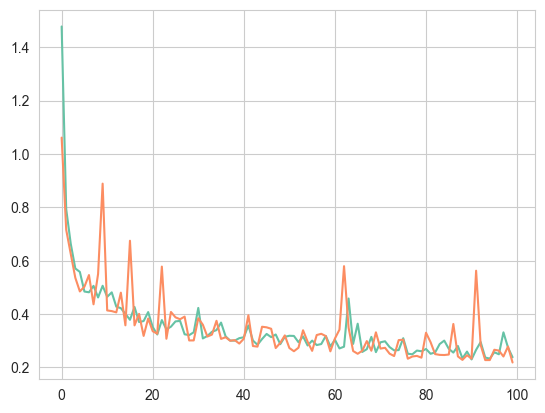

In [237]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

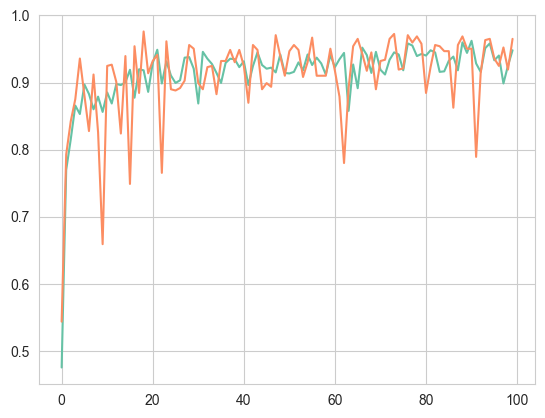

In [238]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [239]:
pred = model.predict(x_val)

18/18 [==============================] - 0s 2ms/step


In [240]:
pred = np.where(pred>0.5,1,0)

In [241]:
accuracy_score(pred, y_val)

0.9652014652014652

In [242]:
a = model.predict(x_train)

40/40 [==============================] - 0s 1ms/step


In [243]:
a = np.where(a>0.5, 1, 0)

In [244]:
accuracy_score(a, y_train)

0.966248037676609

In [250]:
print(classification_report(pred, y_val))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       133
           1       0.99      0.93      0.96       153
           2       0.93      0.96      0.95       137
           3       0.96      0.99      0.98       123

   micro avg       0.97      0.97      0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546
 samples avg       0.97      0.97      0.97       546



In [255]:
pred = pred.argmax(axis=1)
y_val = y_val.argmax(axis = 1)

<Axes: >

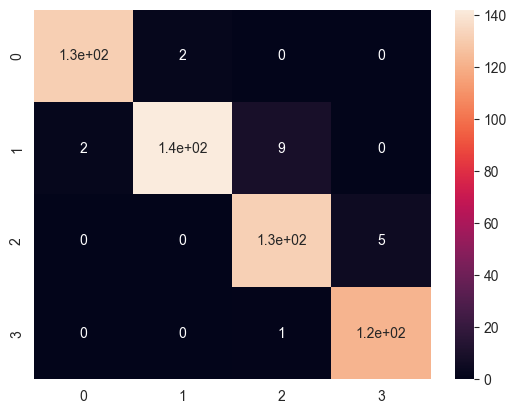

In [262]:
sns.heatmap(confusion_matrix(pred, y_val), annot=True)